# Establishing connection with database

In [284]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
server = 'whats-cooking.database.windows.net'
database = 'whats-cooking'
username = 'abehrhof'
password = 'E9RE8ih!fBaE9P$^*5z$Ztr*'
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

## Getting the total numbers of recipes in datbase


In [293]:
df = pd.read_sql_query("SELECT recipeId FROM recipes",conn)
length = len(df)
print(f"There are {length} recipes in recipe book right now.")



There are 2 recipes in recipe book right now.


### Listing every unique recipe name in the database

In [294]:

df = pd.read_sql_query("SELECT recipeName FROM recipes",conn).drop_duplicates()
df.index += 1 
  
def highlight_cols(x):
    df = x.copy()
    df.loc[:, :] =  'color : green'
    return df 
display(df.style.apply(highlight_cols, axis = None))









,recipeName
1,Easy Veggie Pasta
2,Green Chile Chicken Stew


####  Types of meals are shown according to their popularity in following piechart and Histograms

Text(0.5, 1.0, 'Number of appearances in dataset')

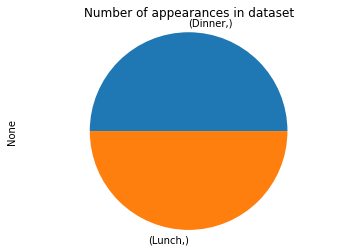

In [295]:
df = pd.read_sql_query("SELECT category FROM recipes",conn)

df.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Number of appearances in dataset')


Text(0.5, 0, 'Frequency')

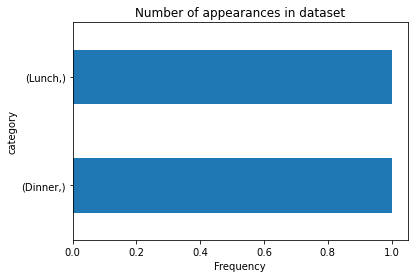

In [296]:
df.value_counts().plot(kind='barh')
plt.title('Number of appearances in dataset')
plt.xlabel('Frequency')

#### No of users that have uploded their recipe in the app

In [297]:
df = pd.read_sql_query("SELECT authorId FROM recipes",conn)
users = df.values.tolist()
visited = []
for i in range(0, len(users)):
    
    if users[i] not in visited: 
        
        visited.append(users[i])
no_of_users = len(visited)


print(f" Till now  {no_of_users}  users  have uploaded recipe to 'What's Cooking' ")


 Till now  2  users  have uploaded recipe to 'What's Cooking' 
